In [1]:
# import lib and functions
from sklearn import svm
from Load_Data import LoadData
import matplotlib.pyplot as plt
#get_ipython().magic('matplotlib inline')
from scipy import misc
import numpy as np
import pandas as pd
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression

In [2]:
# list name of method and features
accuracy= {}
models = ['vgg16', 'vgg19', 'resnet50', 'inceptionv3']
kernels = ['linear', 'rbf', 'sigmoid']

In [3]:
for model in models:
    accuracy[model] = []
    for i in range(1,3):
        temp_accuracy=[]

        train_X, test_X, train_Y, test_Y = LoadData().loadData('db'+str(i), model)

        clf = svm.SVC(kernel='linear',C=1.5).fit(train_X, train_Y) ## svm kernel linear
        temp_accuracy.append(clf.score(test_X, test_Y)) ## add accuracy

        clf = svm.SVC(kernel='rbf',C=1).fit(train_X, train_Y) ## svm kernel rbf
        temp_accuracy.append(clf.score(test_X,test_Y)) 

        clf = svm.SVC(kernel='sigmoid',C=1).fit(train_X, train_Y) ## svm kernel sigmoid
        temp_accuracy.append(clf.score(test_X, test_Y))

        #clf = LinearRegression().fit(train_X, train_Y)
        #temp_accuracy.append(clf.score(test_X, test_Y))

        accuracy[model].append(temp_accuracy)


In [4]:
# run test and show results
acc_table = {}
for model in models:
    print(model)
    acc_table[model] = pd.DataFrame(accuracy[model], columns=kernels)
    print(acc_table[model])

vgg16
     linear       rbf   sigmoid
0  0.945946  0.967568  0.908108
1  0.945946  0.945946  0.918919
vgg19
     linear       rbf   sigmoid
0  0.951351  0.956757  0.935135
1  0.956757  0.967568  0.929730
resnet50
     linear       rbf   sigmoid
0  0.962162  0.962162  0.945946
1  0.951351  0.945946  0.929730
inceptionv3
     linear       rbf   sigmoid
0  0.940541  0.924324  0.924324
1  0.940541  0.924324  0.918919


In [5]:
# write to csv file
with open('results.csv', mode='w') as result_file:
    result_file.write(',')
    for kernel in kernels:
        result_file.write(kernel +',')
    result_file.write('\n')
    for model in models:
        result_file.write(model + '\n')            
        for ele in accuracy[model]:
            result_file.write(',')
            for value in ele: 
            # result_file.write(''+',')
                result_file.write(str(value) + ',')
            result_file.write('\n')


In [6]:

# Comparision on Excel file

In [7]:
# Compute 
print 'vgg16:'
print(acc_table['vgg16'].std())
print 'vgg19:'
print(acc_table['vgg19'].std())
print 'resnet50:'
print(acc_table['resnet50'].std())
print 'inceptionv3:'
print(acc_table['inceptionv3'].std())

vgg16:
linear     0.000000
rbf        0.015289
sigmoid    0.007644
dtype: float64
vgg19:
linear     0.003822
rbf        0.007644
sigmoid    0.003822
dtype: float64
resnet50:
linear     0.007644
rbf        0.011467
sigmoid    0.011467
dtype: float64
inceptionv3:
linear     0.000000
rbf        0.000000
sigmoid    0.003822
dtype: float64


In [8]:

print "SVC Linear: %s - %s \n SVC rbf: %s - %s \nSVC Sigmoid: %s - %s"%(accuracy[0][0],accuracy[1][0],accuracy[0][1],accuracy[1][1],accuracy[0][2],accuracy[1][2])


KeyError: 0

In [8]:
label_SVM = clf.predict(test_X)

In [9]:

# get image list
imageData = LoadData().getImagePath('db2')

In [10]:

count = test_Y.shape[0] - sum((label_SVM==test_Y)*1)
print(count)

15


In [11]:
print(test_Y.shape)

(185,)


/home/longtq/vision/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



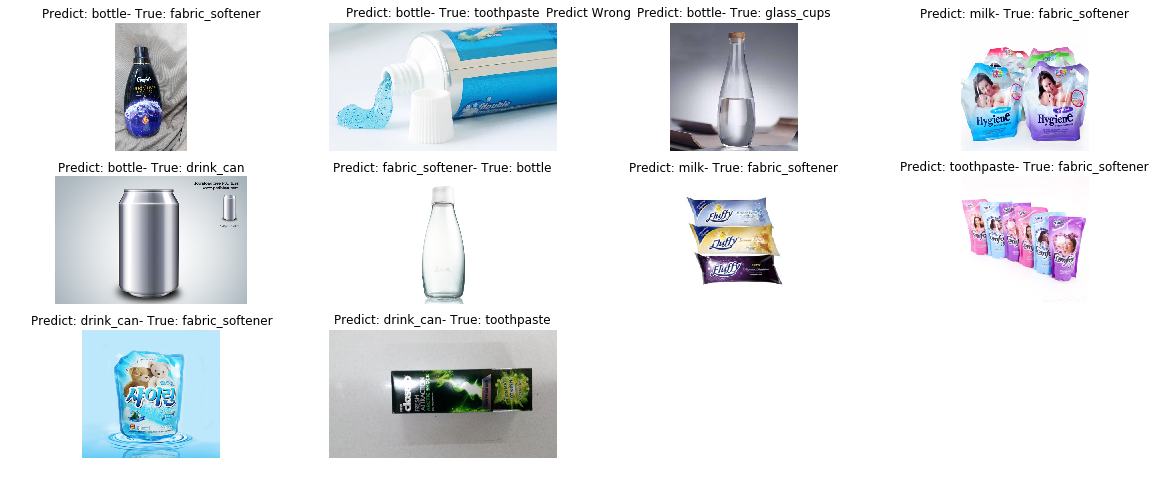

In [12]:
imageTest = imageData['testImages']
# create a fig to show image
fig = plt.figure(figsize=(20,8))

plt.title('Predict Wrong')
plt.axis('off')

predictTrue = label_SVM == test_Y
count = 0
# for all 0-9 labels
for i in range(test_Y.shape[0]):
    if count > 9:
        break
    if not predictTrue[i]:
        # initialize subplots in a grid 2x5 at i+1th position
        image = misc.imread(imageTest[i], mode='RGB')
        ax = fig.add_subplot(3, 4, 1+count) 
        # display image
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title("Predict: " + label_SVM[i] + "- True: " + test_Y[i])
        #ax.set_title("True: " + test_Y[i])
        #don't show the axes
        plt.axis('off')
        count += 1
plt.show()


In [13]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

confu_matrix = confusion_matrix(test_Y, label_SVM, labels=classes)

df = pd.DataFrame(confu_matrix, index=classes, columns = classes)
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix')
sn.heatmap(df, annot=True)

NameError: name 'classes' is not defined